# This notebook scrapes current data from DAFT.IE on Properties for Rent 

### Scroll down through this code section to reach the report 1, showing average county rental rates

In [2]:
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import pandas as pd
import re

headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.90 Safari/537.36'}

listOfPrices = []
xPlot = []
listOfAverages = []

count = 20
countWeeklyRents=0

pandaListOfCounties = []
pandaListOfPrices = []
listOfHouseTypes = []
listOfAddresses = []
listOfBeds=[]
listOfURLS=[]

listOfCounties = ['carlow', 'cavan', 'clare', 'cork', 'donegal', 'galway', 'kerry', 'kildare', 'kilkenny', 'laois', 'leitrim', 'limerick', 'louth', 'mayo', 'meath', 'offaly', 'roscommon', 'sligo', 'tipperary', 'waterford', 'westmeath', 'wexford', 'wicklow']
def getAverage(listOfPrices):
	averagePrice = sum(listOfPrices) / float(len(listOfPrices))
	averagePrice = round(averagePrice)
	return averagePrice



for place in listOfCounties:

	listOfPrices = []

	for i in range(0,1):	
#https://www.daft.ie/property-for-rent/sligo/houses?adState=sale-agreed&sort=priceAsc&numBeds_from=3&numBeds_to=3&firstPublishDate_from=now-40d%2Fd
		url = 'https://www.daft.ie/property-for-rent/'+ place + '/?offset='
		#url = 'https://www.daft.ie/property-for-rent/'+ place + '?adState=sale-agreed&firstPublishDate_from=now-40d&offset='
		url = url + str(count)
		count = count + 20
		print("Importing Data....")
		response = requests.get(url, headers=headers)
		c = response.content
		soup = BeautifulSoup(c, features='html.parser')
		#print(soup)
		prices = soup.find_all('span', {'class':'TitleBlock__StyledSpan-sc-1avkvav-5 fKAzIL'})
		houseTypes = soup.find_all('p', {'class': 'TitleBlock__CardInfoItem-sc-1avkvav-9 cKZZql'})
		houseAddress = soup.find_all('p', {'class':'TitleBlock__Address-sc-1avkvav-8 dzihyY'})
		noBeds=soup.find_all('p',{'class': 'TitleBlock__CardInfoItem-sc-1avkvav-9 iLMdur', 'data-testid': 'beds'})
		#houseURL=soup.find_all('a',{'class': 'SearchPage__Result-gg133s-2 djuMQD'})
		#print(noBeds)
		#print(houseURL)
		for price, house, address, beds in zip(prices, houseTypes, houseAddress, noBeds):
			itemPrice = price.get_text()
			itemPrice = itemPrice.replace("€","")
			itemPrice = itemPrice.replace(",","")
			fullstring = itemPrice
			substring = "per week"
			substring2 = "per month"
			if substring in fullstring:
				itemPrice2=1000 #float(itemPrice.replace(" per week",""))*4.3
				countWeeklyRents=countWeeklyRents+1
			elif substring2 in fullstring:
				itemPrice = itemPrice.replace(" per month","")
				itemPrice2=float(itemPrice)
			else:
				itemprice2=0
			#itemPrice = itemPrice.replace(" per week","")     
			#if(itemPrice.isdigit()):
			itemPrice = float(itemPrice2)
			listOfPrices.append(itemPrice)
			pandaListOfCounties.append(place)
			pandaListOfPrices.append(itemPrice)
			newHouse = house.get_text()
			newAddress = address.get_text()
			newBeds= beds.get_text()
			#newURL= URLS.get_text()
			listOfHouseTypes.append(newHouse)
			listOfAddresses.append(newAddress)
			listOfBeds.append(newBeds)
			#listOfURLS.append(newURL)
			#print(newAddress)
			#print(newHouse)
			#print(newBeds)
			#print(itemPrice)
			#print(newURL)            
            
		if(prices == []):
			break
		#print(listOfPrices)
		#print(url)
	averageStatement = 'The average price of a house in ' + place + ' is €' + str(getAverage(listOfPrices))
	averageHousePrice = getAverage(listOfPrices)

	listOfAverages.append(averageHousePrice)

	count = 0
print("Data Imported!!")


Importing Data....
Importing Data....
Importing Data....
Importing Data....
Importing Data....
Importing Data....
Importing Data....
Importing Data....
Importing Data....
Importing Data....
Importing Data....
Importing Data....
Importing Data....
Importing Data....
Importing Data....
Importing Data....
Importing Data....
Importing Data....
Importing Data....
Importing Data....
Importing Data....
Importing Data....
Importing Data....
Data Imported!!


In [3]:
house_details = {
	'county':pandaListOfCounties,
	'price':pandaListOfPrices,
	'house_type':listOfHouseTypes,
	'house_address':listOfAddresses,
	'beds':listOfBeds
}
print(countWeeklyRents)

28


## 1. Table of Average Rental Prices x County (excluding Dublin)

In [4]:
df = pd.DataFrame(house_details) 
dfAvgs=pd.DataFrame(data=listOfAverages,index=listOfCounties) 
dfAvgs=dfAvgs.sort_values(by=[0], ascending=False) 
display(dfAvgs)

0
wicklow    1909
galway     1696
cork       1654
kildare    1645
laois      1600
meath      1493
limerick   1470
waterford  1408
carlow     1388
kerry      1380
clare      1324
louth      1293
kilkenny   1283
wexford    1283
offaly     1264
westmeath  1243
cavan      1141
roscommon  1141
tipperary  1078
mayo       1003
sligo       982
donegal     929
leitrim     828

## 2. Chart of Average Rents x County (excluding Dublin)

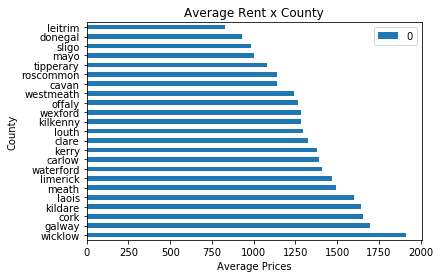

In [5]:
#plt.bar(range(len(data)), sorted(data), color='red', alpha=0.5)
#plt.barh(listOfCounties, listOfAverages)
dfAvgs.plot(kind='barh')
plt.ylabel('County')
plt.title('Average Rent x County')
plt.xlabel('Average Prices')
plt.legend()
plt.show()

## 3. 3-Bedroom Houses in Sligo Mayo Roscommon Leitrim Cavan Donegal

In [6]:
dfhouse=df.query('house_type == "House" and beds=="3 Bed"and price>100 and (county=="sligo" or county=="mayo"or county=="roscommon"or county=="leitrim"or county=="cavan"or county=="donegal")')
display(dfhouse)
print("Count")
print(dfhouse['price'].count())
print("Average")
print(dfhouse['price'].mean())
print("Median")
print(dfhouse['price'].median())

beds     county                                      house_address  \
10   3 Bed      cavan                   Ballinagh1, Ballinagh, Co. Cavan   
13   3 Bed      cavan    3 Claremont Cockhill h12 wa44, Cavan, Co. Cavan   
51   3 Bed    donegal      44 Whitethorn Grove, Letterkenny, Co. Donegal   
52   3 Bed    donegal             Creesloughbeg, Creeslough, Co. Donegal   
55   3 Bed    donegal            Birchill Upper, Creeslough, Co. Donegal   
65   3 Bed    donegal           Aras Ui Dhomhnaill, Milford, Co. Donegal   
66   3 Bed    donegal               Drumnaskea, Letterkenny, Co. Donegal   
135  3 Bed    leitrim             main street, Keshcarrigan, Co. Leitrim   
141  3 Bed    leitrim       12 Castle Street, Manorhamilton, Co. Leitrim   
143  3 Bed    leitrim               4, River Meadow, Dromod, Co. Leitrim   
181  3 Bed       mayo              Carrownahaltore, Ballyglass, Co. Mayo   
184  3 Bed       mayo                   Riverwalk, Crossmolina, Co. Mayo   
185  3 Bed       mayo             6 Clew Bay Cottage, Mulranny, Co. Mayo   
187  3 Bed       mayo          45 Convent Hill Avenue, Ballina, Co. Mayo   
191  3 Bed       mayo      SHRAIGH HILL, BUNNAHOWEN, Belmullet, Co. Mayo   
195  3 Bed       mayo           Sarsfield Cresent, Charlestown, Co. Mayo   
219  3 Bed  roscommon       15 Brooklawn, Ballaghaderreen, Co. Roscommon   
222  3 Bed  roscommon  Cherrytrees, Kilbride, Carrick-on-Shannon, Co....   
228  3 Bed  roscommon          Kildangan, Ballaghaderreen, Co. Roscommon   
230  3 Bed  roscommon                Laragh, Ballintubber, Co. Roscommon   
232  3 Bed  roscommon                      Moore, Athlone, Co. Roscommon   
240  3 Bed      sligo  43 Cahermore Holiday Village, Enniscrone, Co. ...   

    house_type   price  
10       House  1200.0  
13       House  2000.0  
51       House  1000.0  
52       House   950.0  
55       House   800.0  
65       House  1100.0  
66       House   850.0  
135      House   950.0  
141      House   770.0  
143      House  1000.0  
181      House   900.0  
184      House  1000.0  
185      House  1000.0  
187      House  1000.0  
191      House   800.0  
195      House  1000.0  
219      House   950.0  
222      House   900.0  
228      House   800.0  
230      House  1100.0  
232      House  1400.0  
240      House  1000.0

Count
22
Average
1021.3636363636364
Median
1000.0


## 4. 4-Bedroom Houses in Sligo Mayo Roscommon Leitrim Cavan Donegal

In [7]:
dfhouse=df.query('house_type == "House" and beds=="4 Bed"and price>100 and (county=="sligo" or county=="mayo"or county=="roscommon"or county=="leitrim"or county=="cavan"or county=="donegal")')
display(dfhouse)
print("Count")
print(dfhouse['price'].count())
print("Average")
print(dfhouse['price'].mean())
print("Median")
print(dfhouse['price'].median())

beds     county                                      house_address  \
12   4 Bed      cavan                   117 College St, Cavan, Co. Cavan   
49   4 Bed    donegal  Mountain Top area\nLetterkenny, Letterkenny, C...   
53   4 Bed    donegal            48 Thornberry, Letterkenny, Co. Donegal   
56   4 Bed    donegal              Magheraclogher, Derrybeg, Co. Donegal   
57   4 Bed    donegal              94 Ashfield, Letterkenny, Co. Donegal   
58   4 Bed    donegal            6 Admiran Park, Stranorlar, Co. Donegal   
60   4 Bed    donegal  Apple Lodge, Covehill, Port Road, Letterkenny,...   
188  4 Bed       mayo          Sarsfield Crescent, Charlestown, Co. Mayo   
197  4 Bed       mayo                12A Cuan Oisri, Belmullet, Co. Mayo   
224  4 Bed  roscommon         Shannon Valley, Tarmonbarry, Co. Roscommon   
225  4 Bed  roscommon      15, The Waterfront, Tarmonbarry, Co. Longford   
235  4 Bed      sligo  10 beechwood court, oldbundoran Road, Sligo, C...   
239  4 Bed      sligo           63. The Fairways, Tubbercurry, Co. Sligo   
241  4 Bed      sligo  Meadow Brook Mountain Road, Tubbercurry, Co. S...   

    house_type   price  
12       House  1600.0  
49       House  1250.0  
53       House  1200.0  
56       House   850.0  
57       House  1100.0  
58       House   950.0  
60       House   600.0  
188      House  1200.0  
197      House  1000.0  
224      House  1200.0  
225      House  1200.0  
235      House  1400.0  
239      House  1200.0  
241      House   900.0

Count
14
Average
1117.857142857143
Median
1200.0


## 5. All Rentals in all Counties (excluding Dublin)

In [8]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 2,
                       ):
    display(df)


beds     county                                      house_address  \
0    1 Bed     carlow    8 Court Mews, Bridge Street, Tullow, Co. Carlow   
1    1 Bed     carlow                Green Road, Carlow Town, Co. Carlow   
2    4 Bed     carlow      Millbrook, Mill Lane, Carlow Town, Co. Carlow   
3    3 Bed     carlow                    Ballynattin, Borris, Co. Carlow   
4    4 Bed     carlow    Apartment 6, Castle St, Carlow Town, Co. Carlow   
5    4 Bed     carlow                  Wolseley park, Tullow, Co. Carlow   
6    5 Bed     carlow  Court View, Old Dublin Road, Carlow Town, Co. ...   
7    5 Bed     carlow  Crosbie Place, Barrack Street, Carlow Town, Co...   
8    1 Bed     carlow  The Glen Mortarstown Carlow, Carlow Town, Co. ...   
9    4 Bed     carlow  58 Southern Gardens Kilkenny rd carlow, Carlow...   
10   3 Bed      cavan                   Ballinagh1, Ballinagh, Co. Cavan   
11   2 Bed      cavan  Apartment 2, Lower Main Street, Bailieborough,...   
12   4 Bed      cavan                   117 College St, Cavan, Co. Cavan   
13   3 Bed      cavan    3 Claremont Cockhill h12 wa44, Cavan, Co. Cavan   
14   2 Bed      cavan                  dowra blacklion, Dowra, Co. Cavan   
15   2 Bed      cavan              Russell Quay, Ballyconnell, Co. Cavan   
16   5 Bed      clare  Castlefergus Lodge, Ballyhannon Castle, Ennis,...   
17   5 Bed      clare  5 Carnelly Woods, Clarecastle, Co. Clare, Enni...   
18   1 Bed      clare           Ballymulcashel, Sixmilebridge, Co. Clare   
19   1 Bed      clare               Ministers Cross, Bunratty, Co. Clare   
20   2 Bed      clare            Gortgloss, Cranny, Kildysart, Co. Clare   
21   6 Bed      clare                   Lisheen, Ballynacally, Co. Clare   
22   2 Bed      clare                       Mill House, Ennis, Co. Clare   
23   3 Bed      clare                   Church Field, Doonbeg, Co. Clare   
24   2 Bed      clare                     Lack West, Kilmihil, Co. Clare   
25   3 Bed      clare            Ã�ras Bhrian Bhoru, Scarriff, Co. Clare   
26   4 Bed      clare                             Clarecastle, Co. Clare   
27   4 Bed      clare                    59 Clonard, Westbury, Co. Clare   
28   4 Bed      clare                      Castle Rock, Ennis, Co. Clare   
29   2 Bed      clare                    Finian Park, Shannon, Co. Clare   
30   3 Bed      clare  No. 8 Thomond Mills, Frederick Square, Sixmile...   
31   2 Bed      clare  Aillebaun, New Street, Killaloe, Killaloe, Co....   
32   2 Bed      clare                 Coad, Kilnaboy, Corofin, Co. Clare   
33   3 Bed      clare                   Main Street, Kilmihil, Co. Clare   
34   2 Bed       cork       Cloghroe House, Near, Ballincollig, Co. Cork   
35   3 Bed       cork        97 Inis Ã“rga, Curryclogh, Bandon, Co. Cork   
36   3 Bed       cork                 36 The Orchards, Kinsale, Co. Cork   
37   4 Bed       cork                Eagle Valley, Doughcloyne, Co. Cork   
38   3 Bed       cork     58 The Avenue, Garrane Darra, Wilton, Co. Cork   
39   4 Bed       cork            3 Stratton Pines, Bishopstown, Co. Cork   
40   2 Bed       cork                  Apartment 4, Oaksprings, Co. Cork   
41   4 Bed       cork   22 St Finbarrs place Probys Quay Cork , Co. Cork   
42   4 Bed       cork  Church View, Station Road, Ballincollig, Co. Cork   
43   4 Bed       cork                     Clonlara, Kerry Pike, Co. Cork   
44   1 Bed       cork          Togher Road, Togher (Cork City), Co. Cork   
45   2 Bed       cork                           2 Fullers Road, Co. Cork   
46   3 Bed       cork                   barrett place, Macroom, Co. Cork   
47   1 Bed       cork        Apartment 5, Wilton Manor, Wilton, Co. Cork   
48   3 Bed       cork                             Mala, Mallow, Co. Cork   
49   4 Bed    donegal  Mountain Top area\nLetterkenny, Letterkenny, C...   
50   2 Bed    donegal   3 Fountain terrace Milltown, Convoy, Co. Donegal   
51   3 Bed    donegal      44 Whitethorn Grove, Letter

In [9]:
print("Count")
print(df['price'].count())
print("Average")
print(df['price'].mean())
print("Median")
print(df['price'].median())

Count
309
Average
1348.4045307443366
Median
1200.0


### 6. Export to CSV File

In [10]:
dfhouse=df.query('house_type == "House" and (beds=="3 Bed" or beds=="4 Bed")and price>100 and (county=="sligo" or county=="mayo"or county=="roscommon"or county=="leitrim"or county=="cavan"or county=="donegal")')
dfhouse.to_csv('3and4Bedcounty_pricesPerMonth18Jun2022.csv', index=True, encoding='utf-8')

In [11]:
def getAverage(listOfPrices):
	averagePrice = sum(listOfPrices) / float(len(listOfPrices))
	averagePrice = round(averagePrice)
	return averagePrice

